# PART 1: LOAD AND CLEAN DATA

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

Question: who is a target client?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv("BankChurners.csv")

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# There was info about this file
# that we need to delete last two columns
columns_list = df.columns.tolist()
columns_list

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [6]:
columns_to_drop = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df.drop(columns=columns_to_drop)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df.head()

# drop CLIENTNUM
# Attrition_Flag: Existing Customer OR Attrited Customer --> 1 or 0
# Gender --> 1 or 0
# Education_Level --> check and change to numeric
# Marital_Status --> check and change to numeric
# Income_Category --> check and change to numeric
# Card_Category --> check and change to numeric

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
# drop CLIENTNUM
columns_to_drop = ["CLIENTNUM"]
df = df.drop(columns=columns_to_drop)

In [11]:
# Attrition_Flag: Existing Customer OR Attrited Customer --> 1 or 0
# this makes multiple columns with the variable (Separate for yes/no)
from sklearn.preprocessing import OneHotEncoder
variables = ['Attrition_Flag']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [12]:
# drop the second columns
columns_to_drop = ["Attrition_Flag_Attrited Customer"]
df = df.drop(columns=columns_to_drop)

In [13]:
# Gender --> 1 or 0

from sklearn.preprocessing import LabelEncoder
variables = ['Gender']
encoder = LabelEncoder()

# apply the LabelEncoder to specific columns in our DataFrame (see variables above)
df[variables] = df[variables].apply(encoder.fit_transform)

In [14]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer
0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [15]:
# Education_Level --> check and change to numeric
unique_values = df['Education_Level'].unique()
unique_values

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [16]:
# pandas get_dummies to change data to numeric
variable = 'Education_Level'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

In [17]:
df.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
0,45,1,3,Married,$60K - $80K,Blue,39,5,1,3,...,1.625,0.061,1,0,0,0,1,0,0,0
1,49,0,5,Single,Less than $40K,Blue,44,6,1,2,...,3.714,0.105,1,0,0,1,0,0,0,0
2,51,1,3,Married,$80K - $120K,Blue,36,4,1,0,...,2.333,0.000,1,0,0,1,0,0,0,0
3,40,0,4,Unknown,Less than $40K,Blue,34,3,4,1,...,2.333,0.760,1,0,0,0,1,0,0,0
4,40,1,3,Married,$60K - $80K,Blue,21,5,1,0,...,2.500,0.000,1,0,0,0,0,0,1,0


In [18]:
# drop the last column
columns_to_drop = ["Unknown"]
df = df.drop(columns=columns_to_drop)

# the same steps with 
# Marital_Status --> check and change to numeric
# Income_Category --> check and change to numeric
# Card_Category --> check and change to numeric

In [19]:
# Marital_Status --> check and change to numeric
unique_values = df['Marital_Status'].unique()
unique_values

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [20]:
variable = 'Marital_Status'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

In [21]:
# drop the last column
columns_to_drop = ["Unknown"]
df = df.drop(columns=columns_to_drop)

In [22]:
# Income_Category --> check and change to numeric
unique_values = df["Income_Category"].unique()
unique_values

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [23]:
variable = 'Income_Category'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

In [24]:
columns_to_drop = ["Unknown"]
df = df.drop(columns=columns_to_drop)

In [25]:
# Card_Category --> check and change to numeric
unique_values = df['Card_Category'].unique()
unique_values

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [26]:
variable = 'Card_Category'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

In [27]:
# drop the last column
columns_to_drop = ["Platinum"]
df = df.drop(columns=columns_to_drop)

In [28]:
df.head()
# now all data is numeric

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Married,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Silver
0,45,1,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,1,0,0,1,0,0
1,49,0,5,44,6,1,2,8256.0,864,7392.0,...,0,1,0,0,0,0,1,1,0,0
2,51,1,3,36,4,1,0,3418.0,0,3418.0,...,1,0,0,0,0,1,0,1,0,0
3,40,0,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,0,0,1,1,0,0
4,40,1,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,0,1,0,0,1,0,0


# PART 2: Balance of data

In [29]:
class_counts = df['Attrition_Flag_Existing Customer'].value_counts()
class_counts

1    8500
0    1627
Name: Attrition_Flag_Existing Customer, dtype: int64

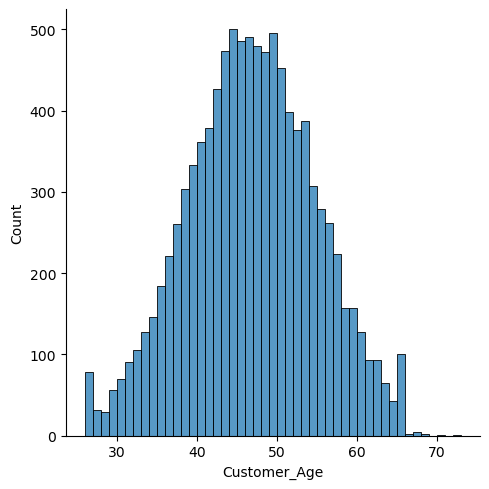

In [30]:
sns.displot(df, x="Customer_Age")

In [31]:
# there is no need to check other columns 
# because we can see that the main columns are more or less balanced
# but we will remove outliers anyway 
# version 1, SciPy, extreme outliers that go under -3 or over +3 in normal distribution
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [32]:
df.to_csv('newbankdata.csv', index=False)

# PART 3: The train/test –split

In [33]:
df.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_Existing Customer', 'College', 'Doctorate', 'Graduate',
       'High School', 'Post-Graduate', 'Uneducated', 'Divorced', 'Married',
       'Single', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Blue', 'Gold', 'Silver'],
      dtype='object')

In [34]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'Divorced', 'Married', 'Single', '$120K +', '$40K - $60K',
       '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Blue', 'Gold',
       'Silver']]


# here we have only the target variable (dependent variable)
y = df['Attrition_Flag_Existing Customer']

In [35]:
# create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
# initialize the scaler and process X-values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [37]:
# create an empty log regression model
# and fit it with out data 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

# PART 5: Error and performance metrics

In [38]:
# make test predictions with new data with our model
predictions = logmodel.predict(X_test)

In [39]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# very good metrics

              precision    recall  f1-score   support

           0       0.71      0.55      0.62       301
           1       0.93      0.96      0.94      1746

    accuracy                           0.90      2047
   macro avg       0.82      0.76      0.78      2047
weighted avg       0.89      0.90      0.90      2047


Model overall accuracy: 90.13%


In [40]:
print(confusion_matrix(y_test, predictions))

# if you want a more graphical version of this, try:
# the fmt-parameter will change to decimal format from scientific format
# sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

# the first row is not good
# but the second row of metrics show better results

[[ 167  134]
 [  68 1678]]


In [41]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y, logmodel.predict_proba(X.values)[:, 1])

# not good resutls but the metric is very sensitive

0.4894710946715216

# PART 6: a tester row

In [42]:
df.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_Existing Customer', 'College', 'Doctorate', 'Graduate',
       'High School', 'Post-Graduate', 'Uneducated', 'Divorced', 'Married',
       'Single', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Blue', 'Gold', 'Silver'],
      dtype='object')

In [43]:
pd.set_option('display.max_columns', None)
df.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Divorced,Married,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Silver
5,44,1,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
14,57,0,2,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
19,45,0,2,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
21,62,0,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
23,47,0,4,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [44]:
# Months_on_book --> Period of relationship with bank
# 'Total_Relationship_Count' --> Total no. of products held by the customer
# Avg_Open_To_Buy' --> Open to Buy Credit Line (Average of last 12 months)
# 'Total_Amt_Chng_Q4_Q1' --> Change in Transaction Amount (Q4 over Q1)
tester_row = {
    'Customer_Age': 32, 
    'Gender': 0, 
    'Dependent_count': 0, 
    'Months_on_book': 36,
    'Total_Relationship_Count': 1, 
    'Months_Inactive_12_mon': 0,
    'Contacts_Count_12_mon': 4, 
    'Credit_Limit': 4000, 
    'Total_Revolving_Bal': 26000,
    'Avg_Open_To_Buy': 16000, 
    'Total_Amt_Chng_Q4_Q1': 1.100, 
    'Total_Trans_Amt': 2200,
    'Total_Trans_Ct': 38, 
    'Total_Ct_Chng_Q4_Q1': 0.700, 
    'Avg_Utilization_Ratio': 0,
    'College': 0, 
    'Doctorate': 0, 
    'Graduate': 1,
    'High School': 0, 
    'Post-Graduate': 0, 
    'Uneducated': 0, 
    'Divorced': 0, 
    'Married': 1,
    'Single': 0, 
    '$120K +': 0, 
    '$40K - $60K': 1, 
    '$60K - $80K': 0, 
    '$80K - $120K': 0,
    'Less than $40K': 0, 
    'Blue': 1, 
    'Gold': 0, 
    'Silver': 0
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print(logmodel.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Does this customer stay in this bank (Yes/No):")
result = labels[logmodel.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[2.06377582e-10 1.00000000e+00]]

Does this customer stay in this bank (Yes/No):
Yes
-------------------


# PART 7: Analysis

This log reg can be used in banking system particulary in the marketing department because they can understand on which customers they need to focus on.

This task was difficult for me becuase I had to think of what I need to change and how to do it.

Possible optimization could be in the decreasing amount of colums. But I am not sure that there is any limit for the amount of columns.